In [ ]:
!pip install librosa soundfile

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from IPython.display import Audio

In [ ]:
y, sr = librosa.load("/content/1-101336-A-30.wav")

In [ ]:
print(f"Duration: {len(y) / sr:.2f} seconds")
print(f"Sample Rate: {sr} Hz")
print(f"Audio shape: {y.shape}")
print(f"Min value: {y.min():.4f}")
print(f"Max value: {y.max():.4f}")

Duration: 5.00 seconds
Sample Rate: 22050 Hz
Audio shape: (110250,)
Min value: -1.0050
Max value: 1.0109


In [ ]:
Audio(y, rate=sr)

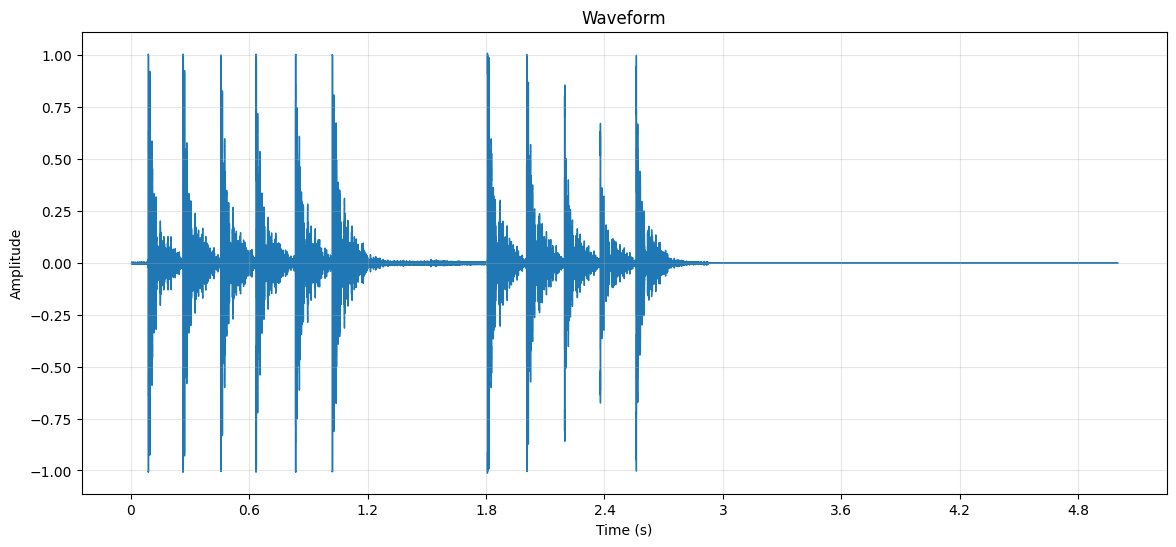

In [ ]:
plt.figure(figsize=(14, 6))
librosa.display.waveshow(y, sr=sr)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.grid(True, alpha=0.3)
plt.show()

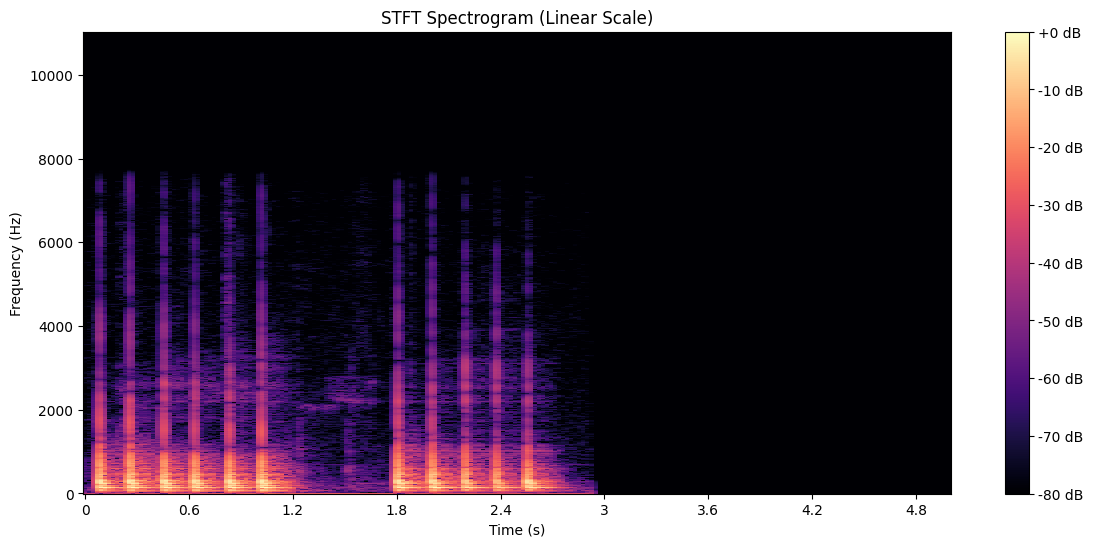

In [ ]:
plt.figure(figsize=(14, 6))
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
img1 = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("STFT Spectrogram (Linear Scale)")
plt.colorbar(img1, format='%+2.0f dB')
plt.show()

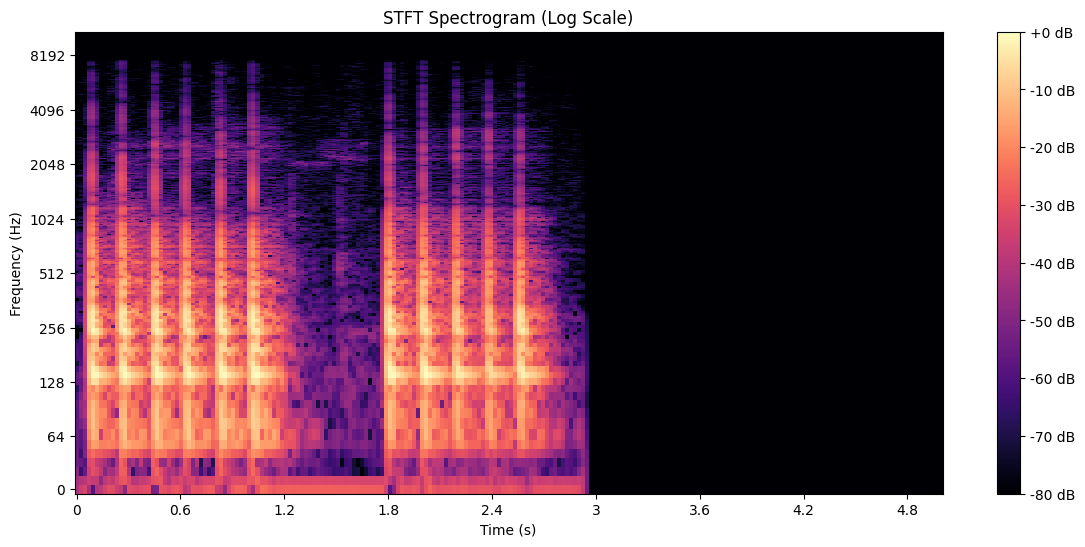

In [ ]:
plt.figure(figsize=(14, 6))
img2 = librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="log")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("STFT Spectrogram (Log Scale)")
plt.colorbar(img2, format='%+2.0f dB')
plt.show()

In [ ]:
zcr = librosa.feature.zero_crossing_rate(y)[0]
rms = librosa.feature.rms(y=y)[0]
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]

In [ ]:
frames = range(len(zcr))
time_frames = librosa.frames_to_time(frames, sr=sr)

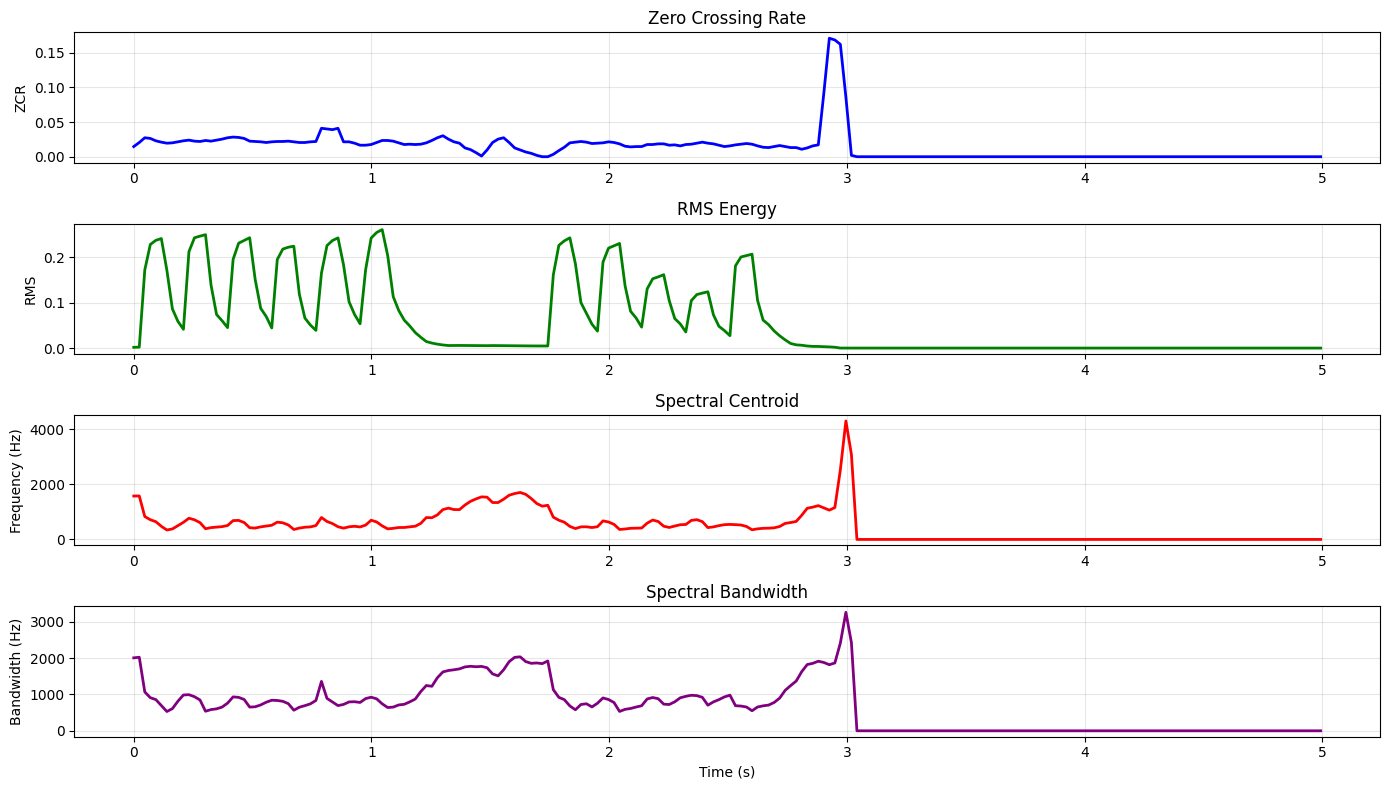

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(14, 8))
axes[0].plot(time_frames, zcr, color="blue", linewidth=2)
axes[0].set_ylabel("ZCR")
axes[0].set_title("Zero Crossing Rate")
axes[0].grid(True, alpha=0.3)

axes[1].plot(time_frames, rms, color="green", linewidth=2)
axes[1].set_ylabel("RMS")
axes[1].set_title("RMS Energy")
axes[1].grid(True, alpha=0.3)

axes[2].plot(time_frames, spectral_centroid, color="red", linewidth=2)
axes[2].set_ylabel("Frequency (Hz)")
axes[2].set_title("Spectral Centroid")
axes[2].grid(True, alpha=0.3)

axes[3].plot(time_frames, spectral_bandwidth, color="purple", linewidth=2)
axes[3].set_xlabel("Time (s)")
axes[3].set_ylabel("Bandwidth (Hz)")
axes[3].set_title("Spectral Bandwidth")
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

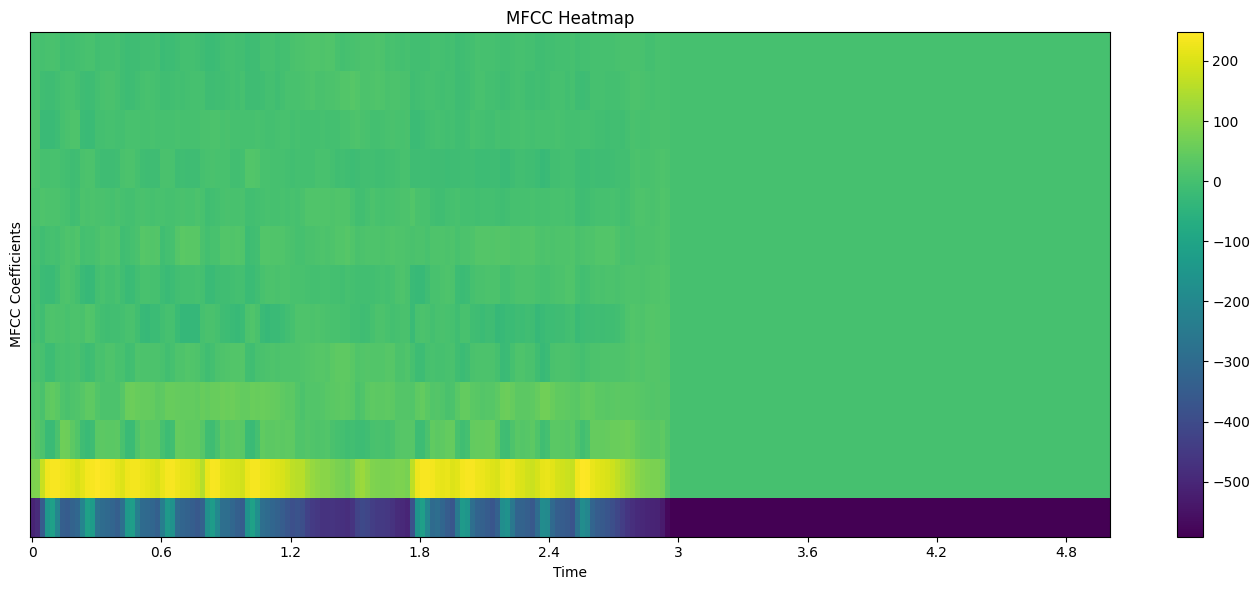

In [ ]:
plt.figure(figsize = (14,6))
img = librosa.display.specshow(mfccs, sr=sr, x_axis="time", cmap="viridis")
plt.ylabel("MFCC Coefficients")
plt.title("MFCC Heatmap")
plt.colorbar(img)
plt.tight_layout()
plt.show()

In [ ]:
y_stretched = librosa.effects.time_stretch(y, rate=1.5)
print(f"Time-stretched duration: {len(y_stretched)/sr:.2f}s")

Time-stretched duration: 3.33s


In [ ]:
y_pitch_shifted = librosa.effects.pitch_shift(y, sr=sr, n_steps=2)
output_file = "manipulated_audio.wav"
sf.write(output_file, y_pitch_shifted, sr)

In [ ]:
display(Audio(y, rate=sr)) # Original Audio

In [ ]:
display(Audio(y_stretched, rate=sr)) # Time-stretched

In [ ]:
display(Audio(y_pitch_shifted, rate=sr)) # Pitch-shifted

In [ ]:
noise = np.random.normal(0, 0.1, len(y))
y_noisy = y + noise
y_noisy = np.clip(y_noisy, -1.0, 1.0)

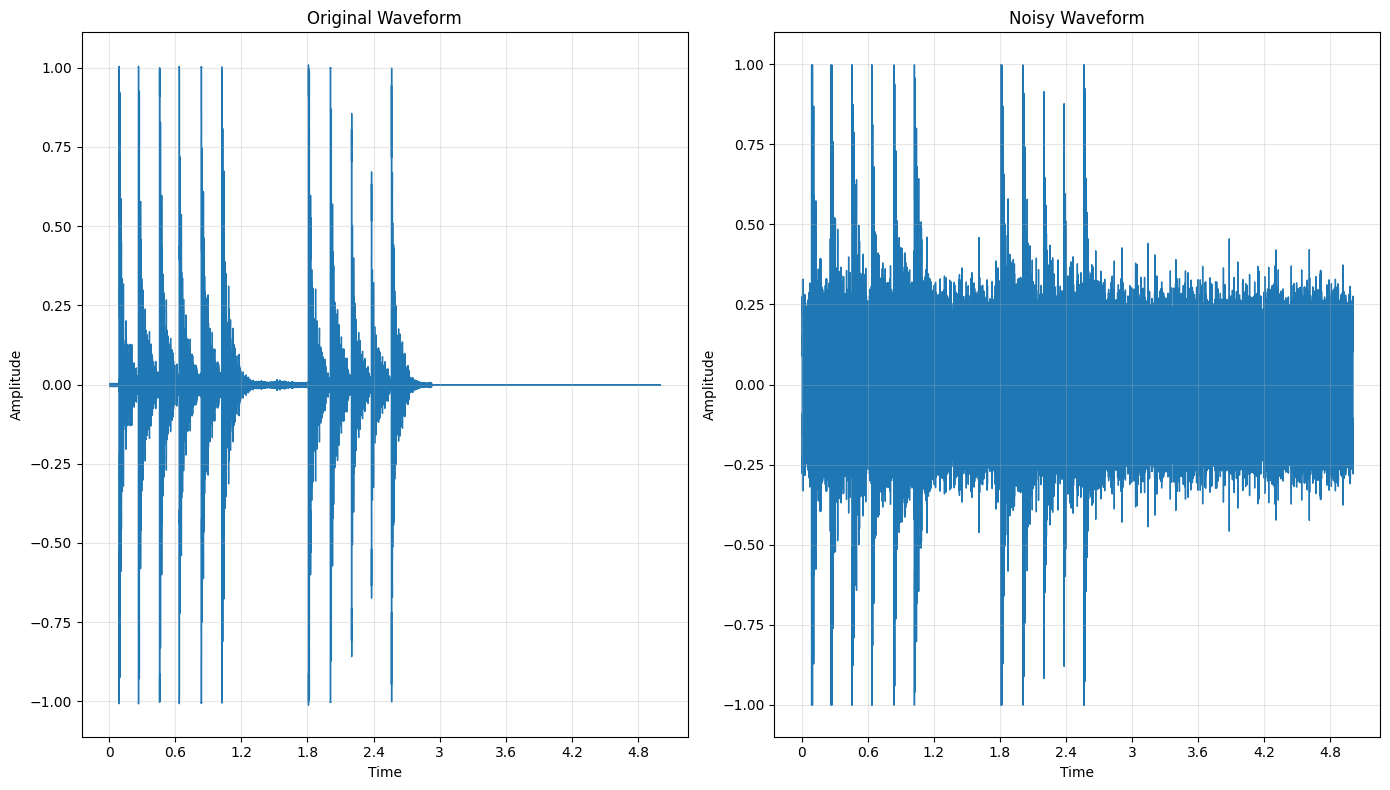

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

librosa.display.waveshow(y, sr=sr, ax=axes[0])
axes[0].set_ylabel("Amplitude")
axes[0].set_title("Original Waveform")
axes[0].grid(True, alpha=0.3)

librosa.display.waveshow(y_noisy, sr=sr, ax=axes[1])
axes[1].set_ylabel("Amplitude")
axes[1].set_title("Noisy Waveform")
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

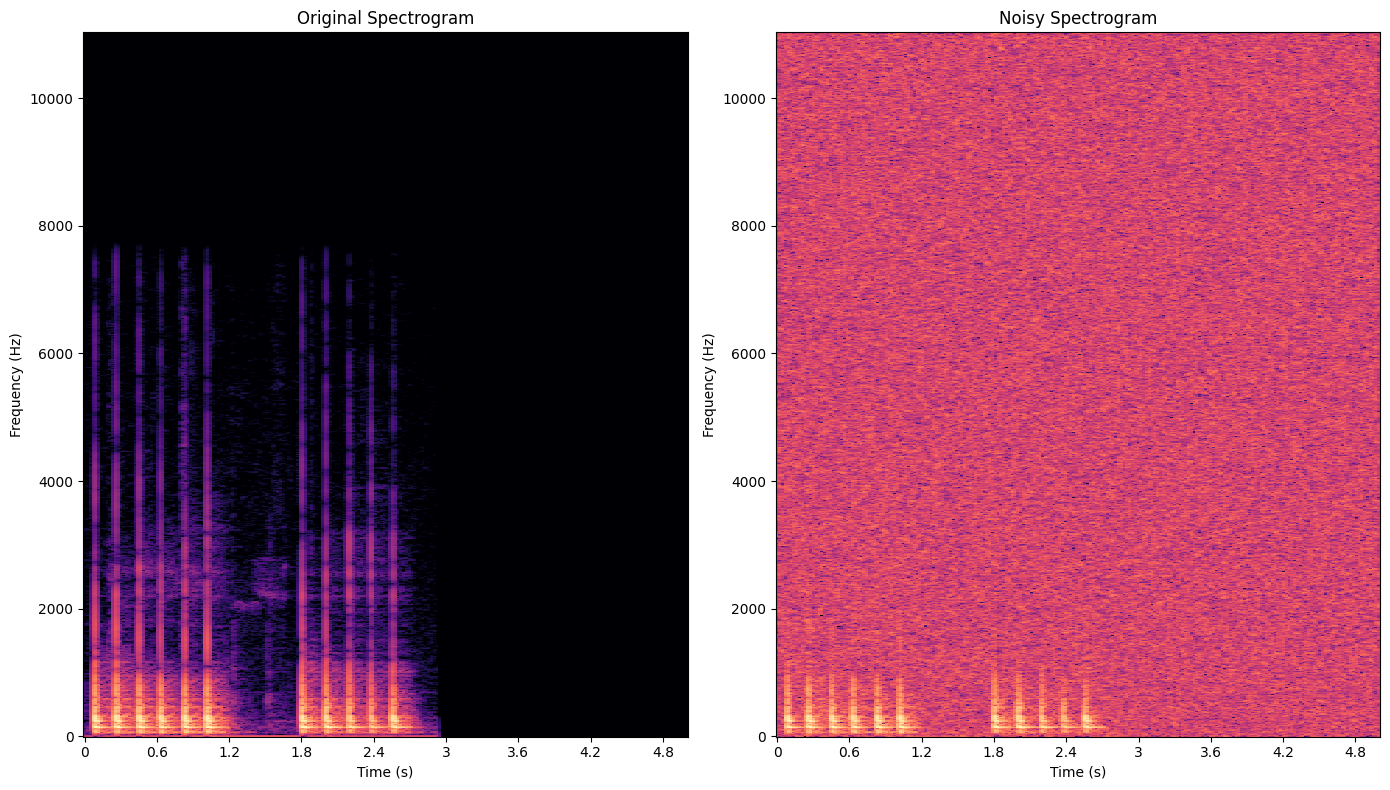

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))
D_original = librosa.stft(y)
S_db_original = librosa.amplitude_to_db(np.abs(D_original), ref=np.max)

D_noisy = librosa.stft(y_noisy)
S_db_noisy = librosa.amplitude_to_db(np.abs(D_noisy), ref=np.max)

img1 = librosa.display.specshow(S_db_original, sr=sr, x_axis='time', y_axis='hz', ax=axes[0])
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Frequency (Hz)")
axes[0].set_title("Original Spectrogram")

img2 = librosa.display.specshow(S_db_noisy, sr=sr, x_axis='time', y_axis='hz', ax=axes[1])
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Frequency (Hz)")
axes[1].set_title("Noisy Spectrogram")
plt.tight_layout()
plt.show()

In [ ]:
display(Audio(y_noisy, rate=sr))